# Introduction

In [ ]:
"""
What? Visualizing Structure in Digits

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook
"""

# Import libraries/modules

In [ ]:
from sklearn.manifold import Isomap
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml
from sklearn.manifold import Isomap

# Import dataset

In [ ]:
"""
Let’s take a look at the MNIST handwritten digits set. This consists of 70,000 images, each with 784 pixels
(i.e., the images are 28×28)

See this link and the discussion on how to retrieve this dataset
https://github.com/ageron/handson-ml/issues/529
"""

In [ ]:
mnist = fetch_openml('MNIST_784') 
mnist.data.shape

In [ ]:
# Since we are given a pandas dataframe, we need to tunr it into a numpy array object
mnist.data.to_numpy()

In [ ]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[])) 
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data.to_numpy()[1250 * i].reshape(28, 28), cmap='gray_r')

# Manifold learning projection

In [ ]:
"""
For speed here, we’ll only use 1/30 of the data, which is about ~2,000 points (because of the relatively poor 
scaling of manifold learning, I find that a few thousand samples is a good number to start with for relatively 
quick exploration before moving to a full calculation):
"""

In [ ]:
# use only 1/30 of the data: full dataset takes a long time! 
data = mnist.data.to_numpy()[::10]
target = mnist.target.to_numpy()[::10]
print(len(data), len(target))

model = Isomap(n_components=2)
proj = model.fit_transform(data)
#plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.scatter(proj[:,  0], proj[:, 1], cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
target

In [ ]:
"""
The resulting scatter plot shows some of the relationships between the data points, but is a bit crowded. We can 
gain more insight by looking at just a single number at a time 
"""

In [ ]:
def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                proj[i])
            ax.add_artist(imagebox)

In [ ]:
data = mnist.data.to_numpy()
target = mnist.target.to_numpy()
data

In [ ]:
target

In [ ]:
target == 1

In [ ]:
data

In [ ]:
data = mnist.data
target = mnist.target
target[target == 1]
target[target == 1.0]
# I am getting a zero-length list!

In [ ]:
# Choose 1/4 of the "1" digits to project
data = data[target == 1][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

#plot_components(data, model, images=data,
                #ax=ax, thumb_frac=0.05, cmap='gray_r')

 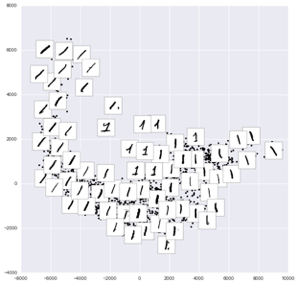

In [ ]:
"""
The result gives you an idea of the variety of forms that the number “1” can take within the dataset. The data 
lies along a broad curve in the projected space, which appears to trace the orientation of the digit. As you move 
up the plot, you find ones that have hats and/or bases, though these are very sparse within the dataset. The 
projection lets us identify outliers that have data issues (i.e., pieces of the neighboring digits that snuck 
into the extracted images).
Now, this in itself may not be useful for the task of classifying digits, but it does help us get an understanding
of the data, and may give us ideas about how to move for‐ ward, such as how we might want to preprocess the data
before building a classifica‐ tion pipeline.
"""